In [28]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-10 05:31:58,097: Credentials are already in use. The existing account in the session will be replaced.


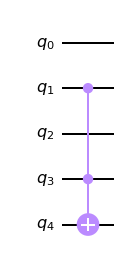

In [11]:
# An Oracle Implementing One And condition
sat_oracle = QuantumCircuit(5) 
sat_oracle.ccx(1,3,4)
sat_oracle.draw()

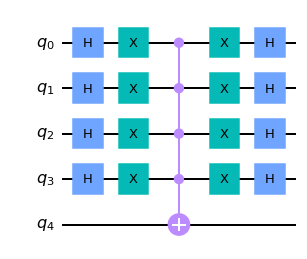

In [50]:
# Reflector 
reflector = QuantumCircuit(5)
reflector.h(0)
reflector.h(1)
reflector.h(2)
reflector.h(3)
reflector.x(0)
reflector.x(1)
reflector.x(2)
reflector.x(3)
reflector.mct([0,1,2,3], 4)
reflector.x(0)
reflector.x(1)
reflector.x(2)
reflector.x(3)
reflector.h(0)
reflector.h(1)
reflector.h(2)
reflector.h(3)
reflector.draw()

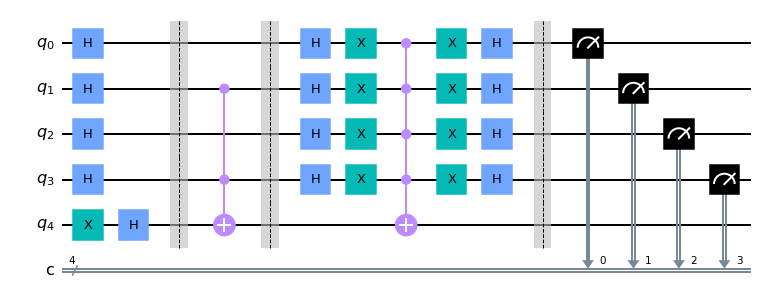

In [51]:
#Full Grover
g_cqt = QuantumCircuit(5,4) 
g_cqt.h(0)
g_cqt.h(1)
g_cqt.h(2)
g_cqt.h(3)
g_cqt.x(4)
g_cqt.h(4)
g_cqt.barrier()
g_cqt = g_cqt + sat_oracle
g_cqt.barrier()
g_cqt = g_cqt + reflector 
g_cqt.barrier()
g_cqt.measure(0,0)
g_cqt.measure(1,1)
g_cqt.measure(2,2)
g_cqt.measure(3,3)
g_cqt.draw()

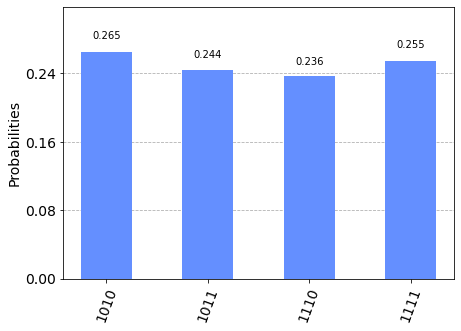

In [52]:
qasm = Aer.get_backend('qasm_simulator')
results = execute(g_cqt, qasm, shots=1024).result().get_counts()
plot_histogram(results)

In [37]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle as leo

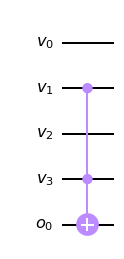

In [57]:
log_exp = ' (a|b|c|d) & (b&d)'
oracle = leo(log_exp, optimization = True)
oracle.construct_circuit().draw()

In [58]:
algorithm = Grover(oracle) 

In [59]:
results = algorithm.run(qasm)

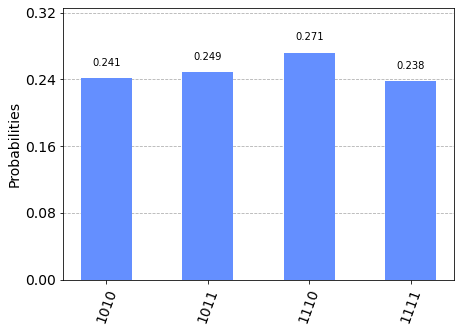

In [60]:
plot_histogram(results['measurement'])